In [64]:
import numpy as np
import pandas as pd
import math
import glob
from pathlib import Path
import torch
import torchmetrics
import itertools
from tqdm import tqdm
from torchmetrics.image.fid import FrechetInceptionDistance
from torchmetrics import MultiScaleStructuralSimilarityIndexMeasure
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

## Unconditional

In [65]:
models = ['B','C','H','F','V']

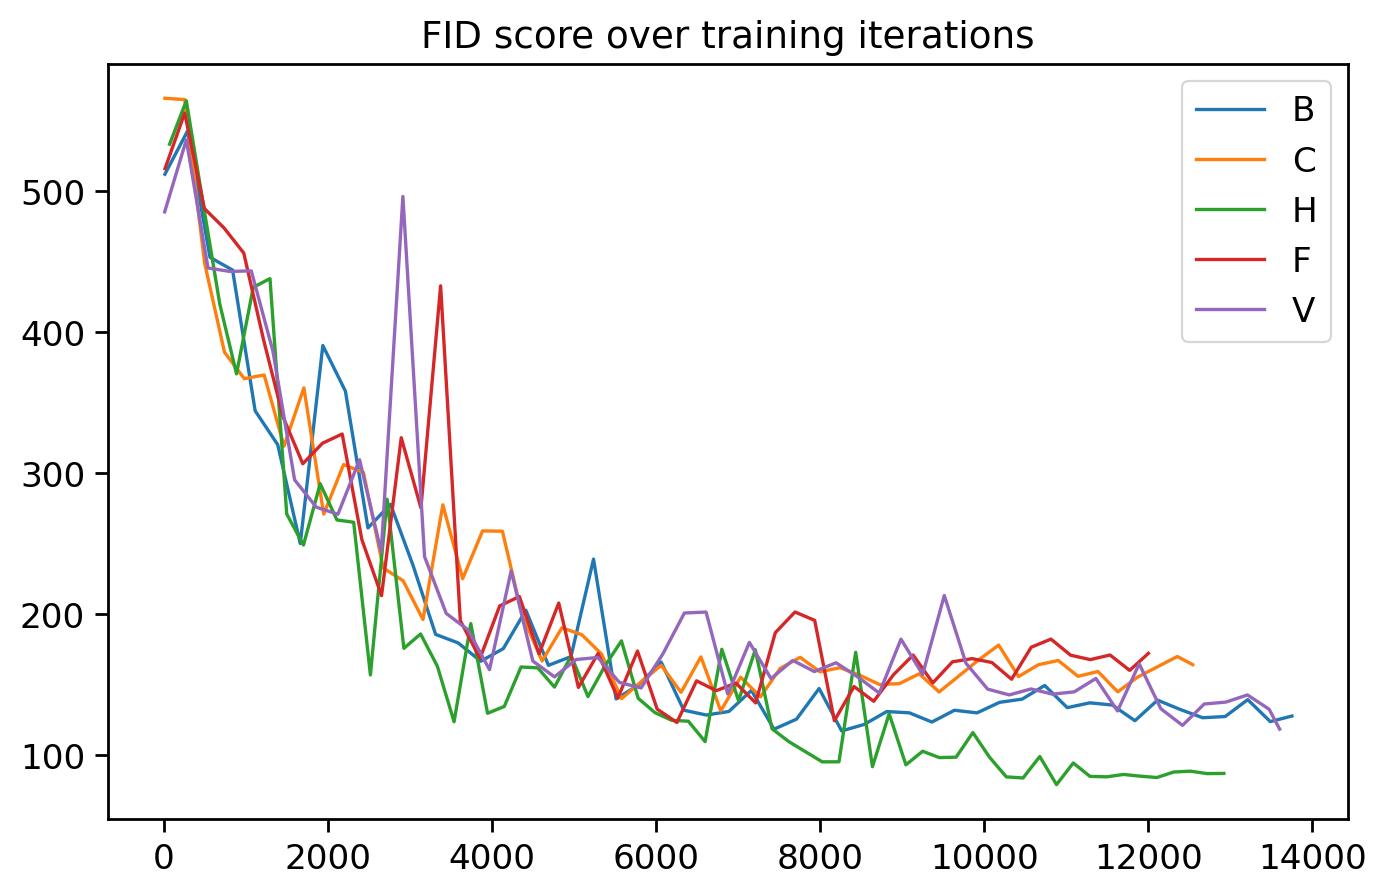

In [66]:
fig, ax = plt.subplots(figsize=(8,5),dpi=200)
for model in models:
    df = pd.read_csv(f'export/train_metrics/unconditional/{model}_train_metrics.csv')
    ax.plot(df['iterations'],df['fid'],label='F' if model[:1]=='P' else f'{model[:1]}')
ax.set_title('FID score over training iterations')
ax.legend()
plt.show()

In [67]:
for model in models:
    df = pd.read_csv(f'export/train_metrics/unconditional/{model}_train_metrics.csv')
    print(f"Lowest FID for model {model}: {df['fid'].min():.3f} in epoch {df.loc[df['fid']==df['fid'].min(),'epoch'].item()}")

Lowest FID for model B: 117.360 in epoch 750
Lowest FID for model C: 131.583 in epoch 616
Lowest FID for model H: 79.314 in epoch 159
Lowest FID for model F: 123.357 in epoch 520
Lowest FID for model V: 118.660 in epoch 1699


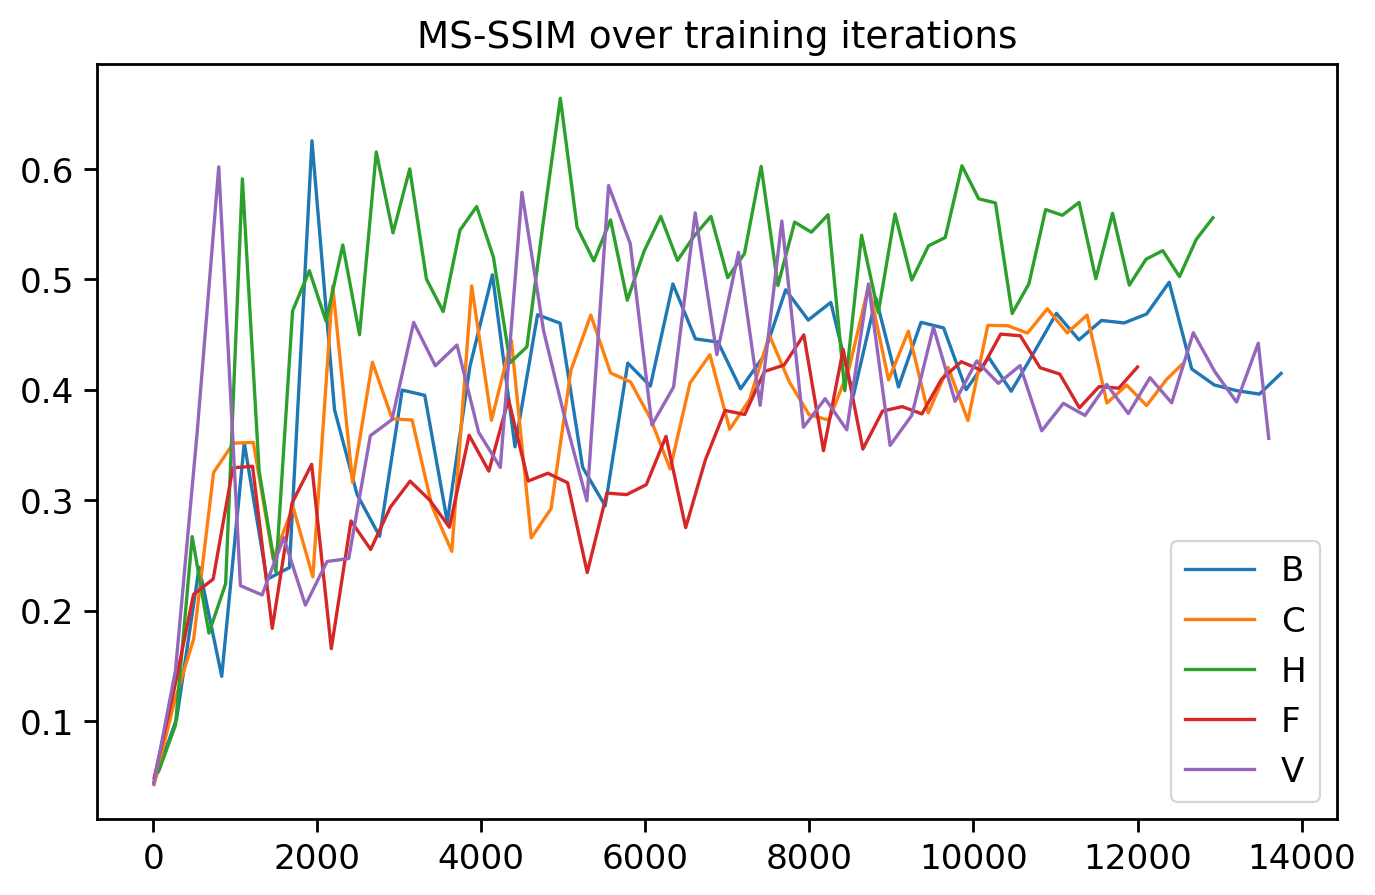

In [68]:
fig, ax = plt.subplots(figsize=(8,5),dpi=200)
for model in models:
    df = pd.read_csv(f'export/train_metrics/unconditional/{model}_train_metrics.csv')
    ax.plot(df['iterations'],df['ms_ssim'],label='F' if model[:1]=='P' else f'{model[:1]}')
ax.set_title('MS-SSIM over training iterations')
ax.legend()
plt.show()

## SD Finetuning

In [69]:
models = ['B','C','H','F','V']

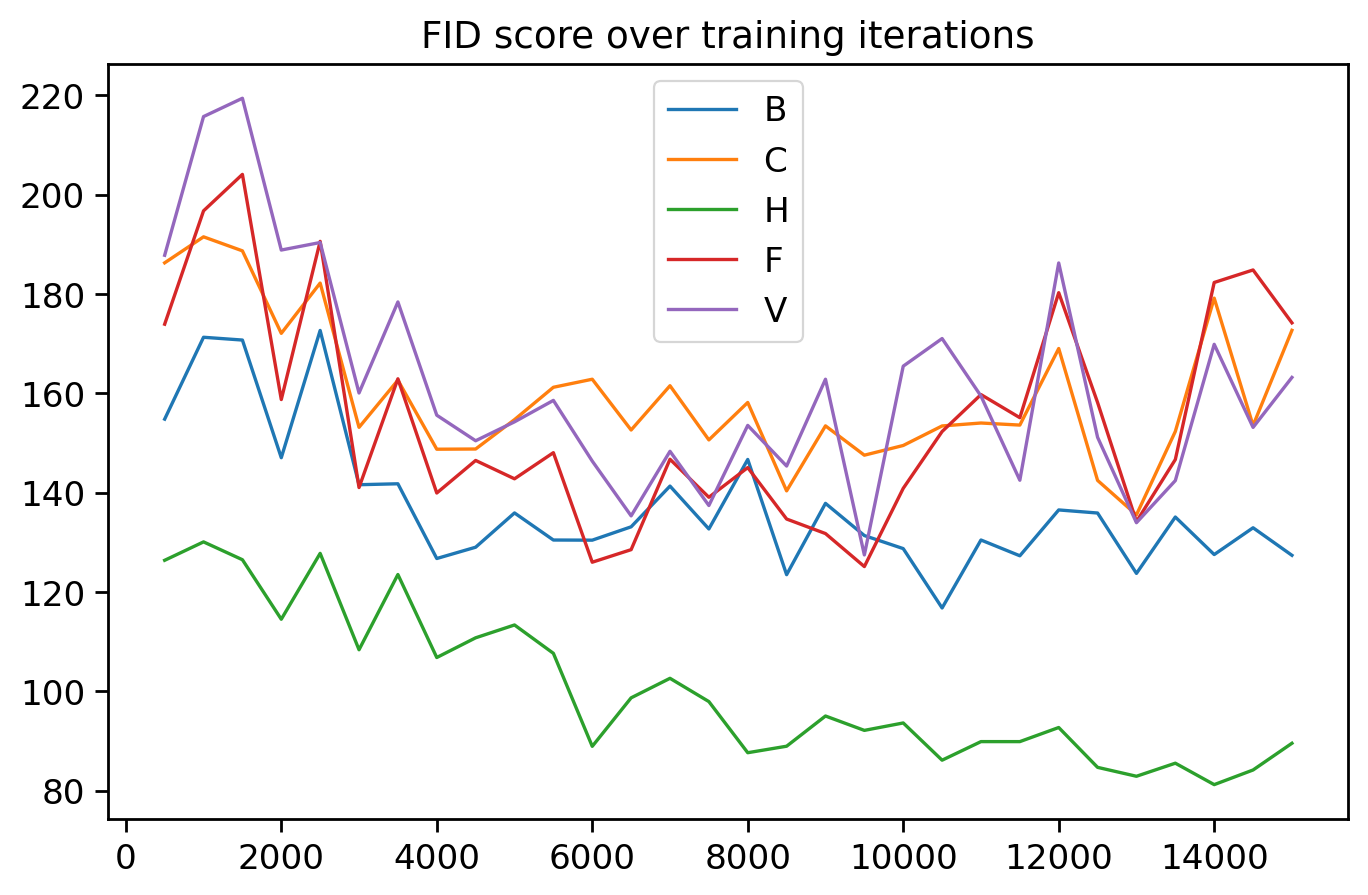

In [70]:
fig, ax = plt.subplots(figsize=(8,5),dpi=200)
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_finetuning/{model}_train_metrics.csv')
    ax.plot(df['iterations'],df['fid'],label=f'{model[:1]}')
ax.set_title('FID score over training iterations')
ax.legend()
plt.show()

In [71]:
fids = []
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_finetuning/{model}_train_metrics.csv')
    fids.append(df['fid'].values)
    print(f"Lowest FID for model {model}: {df['fid'].min():.3f} in iteration {df.loc[df['fid']==df['fid'].min(),'iterations'].item()}")


Lowest FID for model B: 116.765 in iteration 10500
Lowest FID for model C: 135.518 in iteration 13000
Lowest FID for model H: 81.199 in iteration 14000
Lowest FID for model F: 125.101 in iteration 9500
Lowest FID for model V: 127.447 in iteration 9500


In [72]:
df_all = pd.DataFrame(columns=['iterations','fid_B','fid_C','fid_H','fid_F','fid_V'])
df_all['iterations'] = df['iterations']
df_all['fid_B'] = fids[0]
df_all['fid_C'] = fids[1]
df_all['fid_H'] = fids[2]
df_all['fid_F'] = fids[3]
df_all['fid_V'] = fids[4]
df_all['fid_sum'] = df_all['fid_B'] + df_all['fid_C'] + df_all['fid_H'] + df_all['fid_F'] + df_all['fid_V']

In [73]:
print(f"Lowest fid sum: {df_all['fid_sum'].min():.3f} in iteration: {df_all.loc[df_all['fid_sum'] == df_all['fid_sum'].min(),'iterations'].item()}")

Lowest fid sum: 610.211 in iteration: 13000


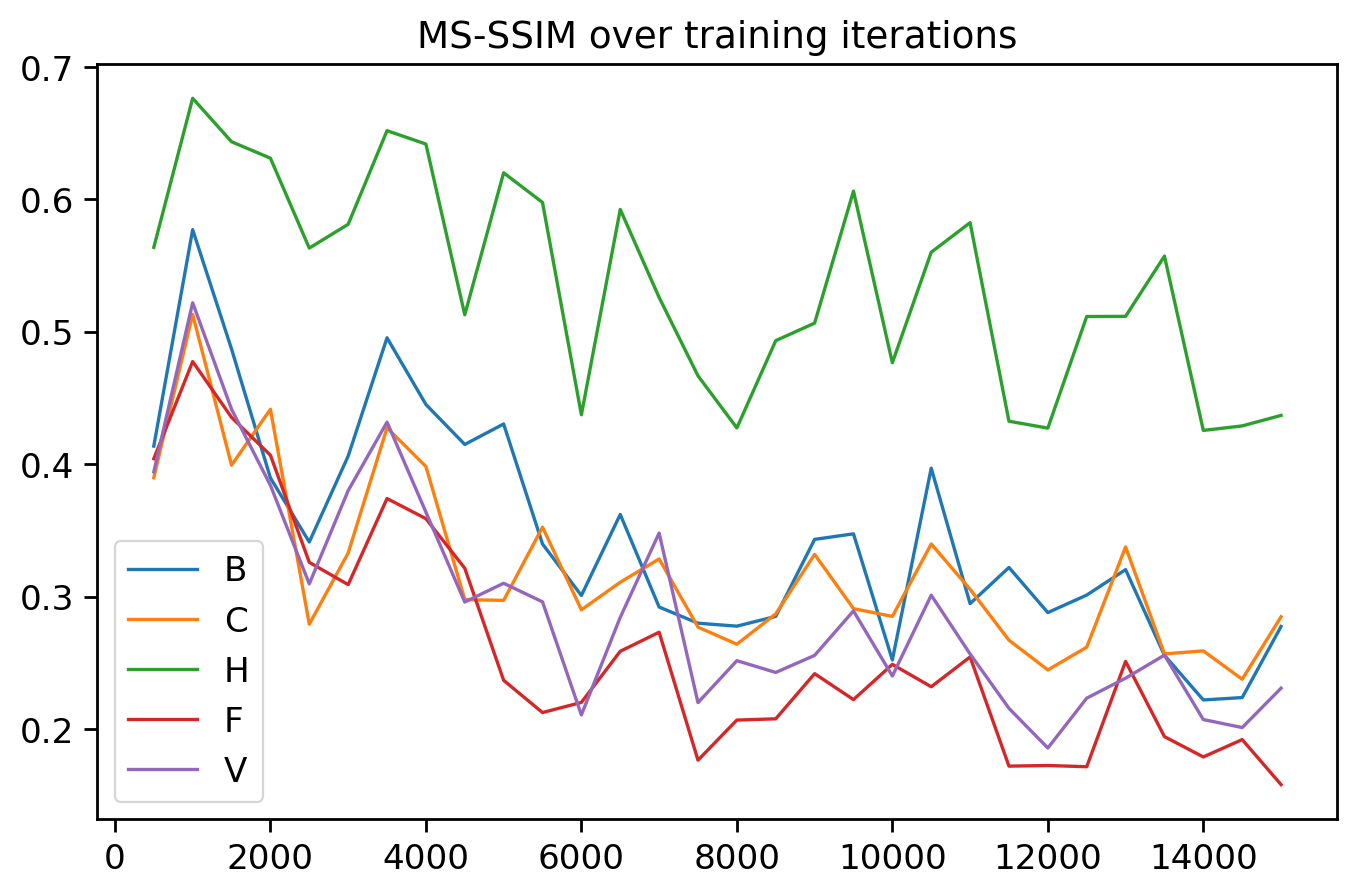

In [74]:
fig, ax = plt.subplots(figsize=(8,5),dpi=200)
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_finetuning/{model}_train_metrics.csv')
    ax.plot(df['iterations'],df['ms_ssim'],label=f'{model[:1]}')
ax.set_title('MS-SSIM over training iterations')
ax.legend()
plt.show()

## SD Lora 1e-4

In [75]:
models = ['B','C','H','F','V']

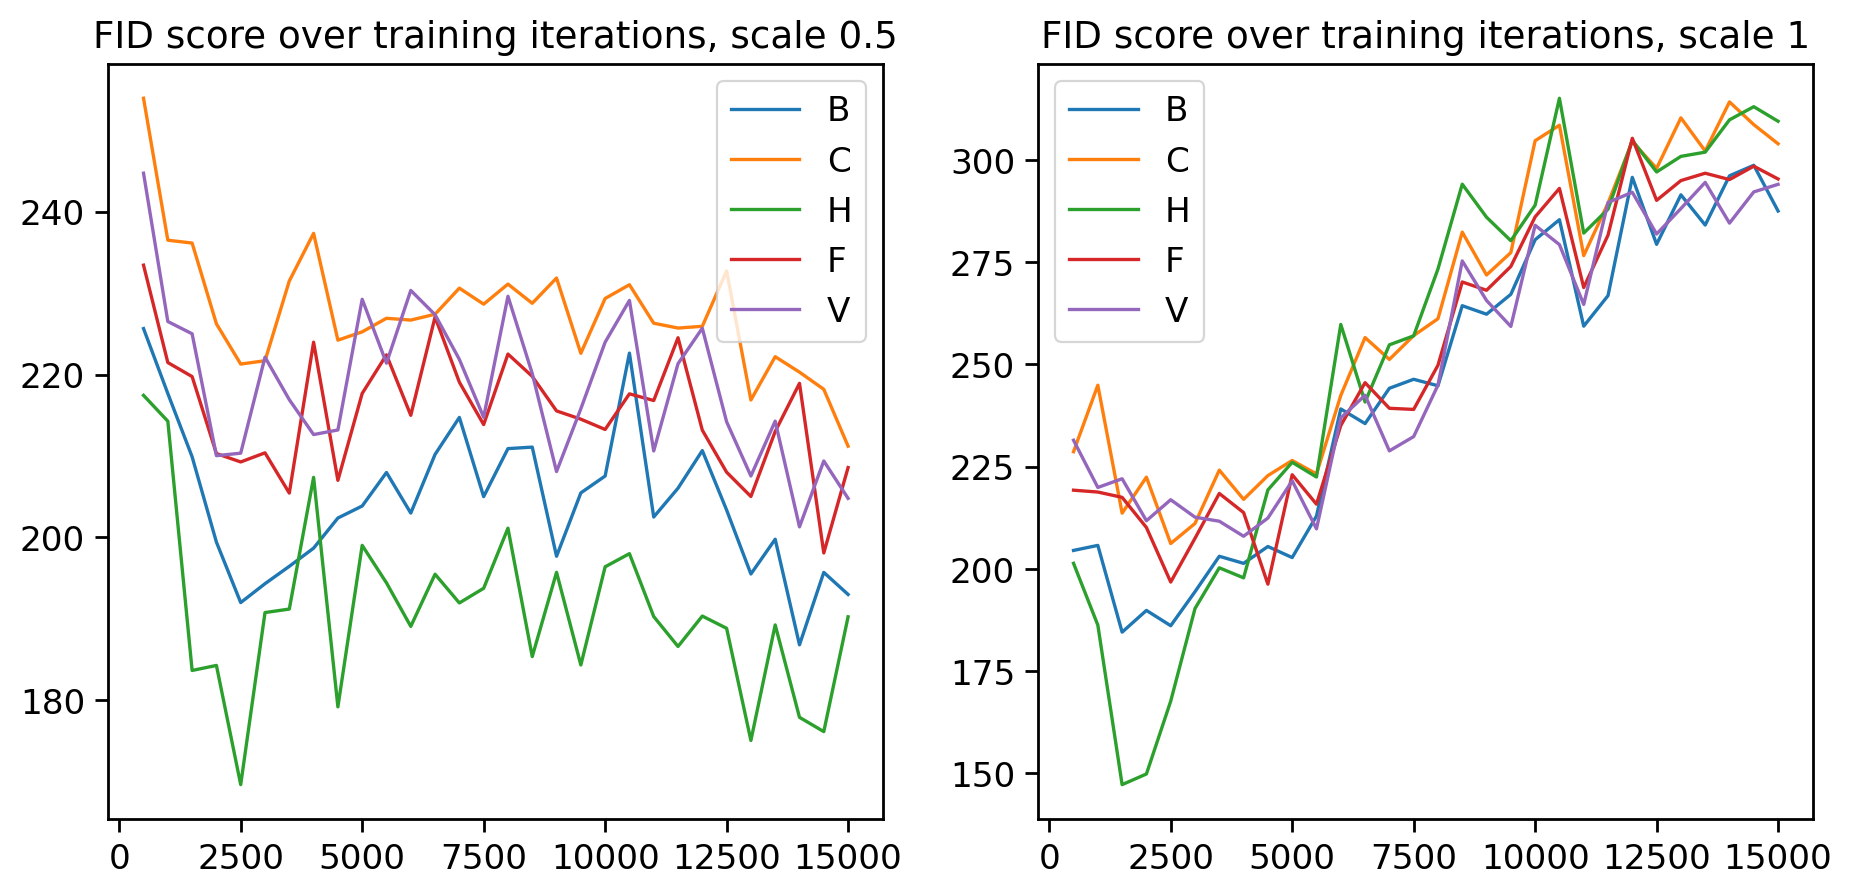

In [76]:
fig, axs = plt.subplots(1,2,figsize=(11,5),dpi=200)
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_lora/1e-4/sd_lora_scale05/{model}_train_metrics.csv')
    axs[0].plot(df['iterations'],df['fid'],label=f'{model[:1]}')
    df = pd.read_csv(f'export/train_metrics/sd_lora/1e-4/sd_lora_scale1/{model}_train_metrics.csv')
    axs[1].plot(df['iterations'],df['fid'],label=f'{model[:1]}')
axs[0].set_title('FID score over training iterations, scale 0.5')
axs[1].set_title('FID score over training iterations, scale 1')
axs[0].legend()
axs[1].legend()
plt.show()

In [77]:
fids05 = []
fids1 = []
print('LORA Scale 05')
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_lora/1e-4/sd_lora_scale05/{model}_train_metrics.csv')
    fids05.append(df['fid'].values)
    print(f"Lowest FID for model {model}: {df['fid'].min():.3f} in iteration {df.loc[df['fid']==df['fid'].min(),'iterations'].item()}")
print('\n')
print('LORA Scale 1')
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_lora/1e-4/sd_lora_scale1/{model}_train_metrics.csv')
    fids1.append(df['fid'].values)
    print(f"Lowest FID for model {model}: {df['fid'].min():.3f} in iteration {df.loc[df['fid']==df['fid'].min(),'iterations'].item()}")

LORA Scale 05
Lowest FID for model B: 186.793 in iteration 14000
Lowest FID for model C: 211.197 in iteration 15000
Lowest FID for model H: 169.617 in iteration 2500
Lowest FID for model F: 198.077 in iteration 14500
Lowest FID for model V: 201.283 in iteration 14000


LORA Scale 1
Lowest FID for model B: 184.516 in iteration 1500
Lowest FID for model C: 206.185 in iteration 2500
Lowest FID for model H: 147.229 in iteration 1500
Lowest FID for model F: 196.250 in iteration 4500
Lowest FID for model V: 207.966 in iteration 4000


In [78]:
df05 = pd.DataFrame(columns=['iterations','fid_B','fid_C','fid_H','fid_F','fid_V'])
df05['iterations'] = df['iterations']
df05['fid_B'] = fids05[0]
df05['fid_C'] = fids05[1]
df05['fid_H'] = fids05[2]
df05['fid_F'] = fids05[3]
df05['fid_V'] = fids05[4]
df05['fid_sum'] = df05['fid_B'] + df05['fid_C'] + df05['fid_H'] + df05['fid_F'] + df05['fid_V']

df1 = pd.DataFrame(columns=['iterations','fid_B','fid_C','fid_H','fid_F','fid_V'])
df1['iterations'] = df['iterations']
df1['fid_B'] = fids1[0]
df1['fid_C'] = fids1[1]
df1['fid_H'] = fids1[2]
df1['fid_F'] = fids1[3]
df1['fid_V'] = fids1[4]
df1['fid_sum'] = df1['fid_B'] + df1['fid_C'] + df1['fid_H'] + df1['fid_F'] + df1['fid_V']

In [79]:
print(f"Scale 05 - Lowest fid sum: {df05['fid_sum'].min():.3f} in iteration: {df05.loc[df05['fid_sum'] == df05['fid_sum'].min(),'iterations'].item()}")
print(f"Scale 1 - Lowest fid sum: {df1['fid_sum'].min():.3f} in iteration: {df1.loc[df1['fid_sum'] == df1['fid_sum'].min(),'iterations'].item()}")

Scale 05 - Lowest fid sum: 997.454 in iteration: 14500
Scale 1 - Lowest fid sum: 973.573 in iteration: 2500


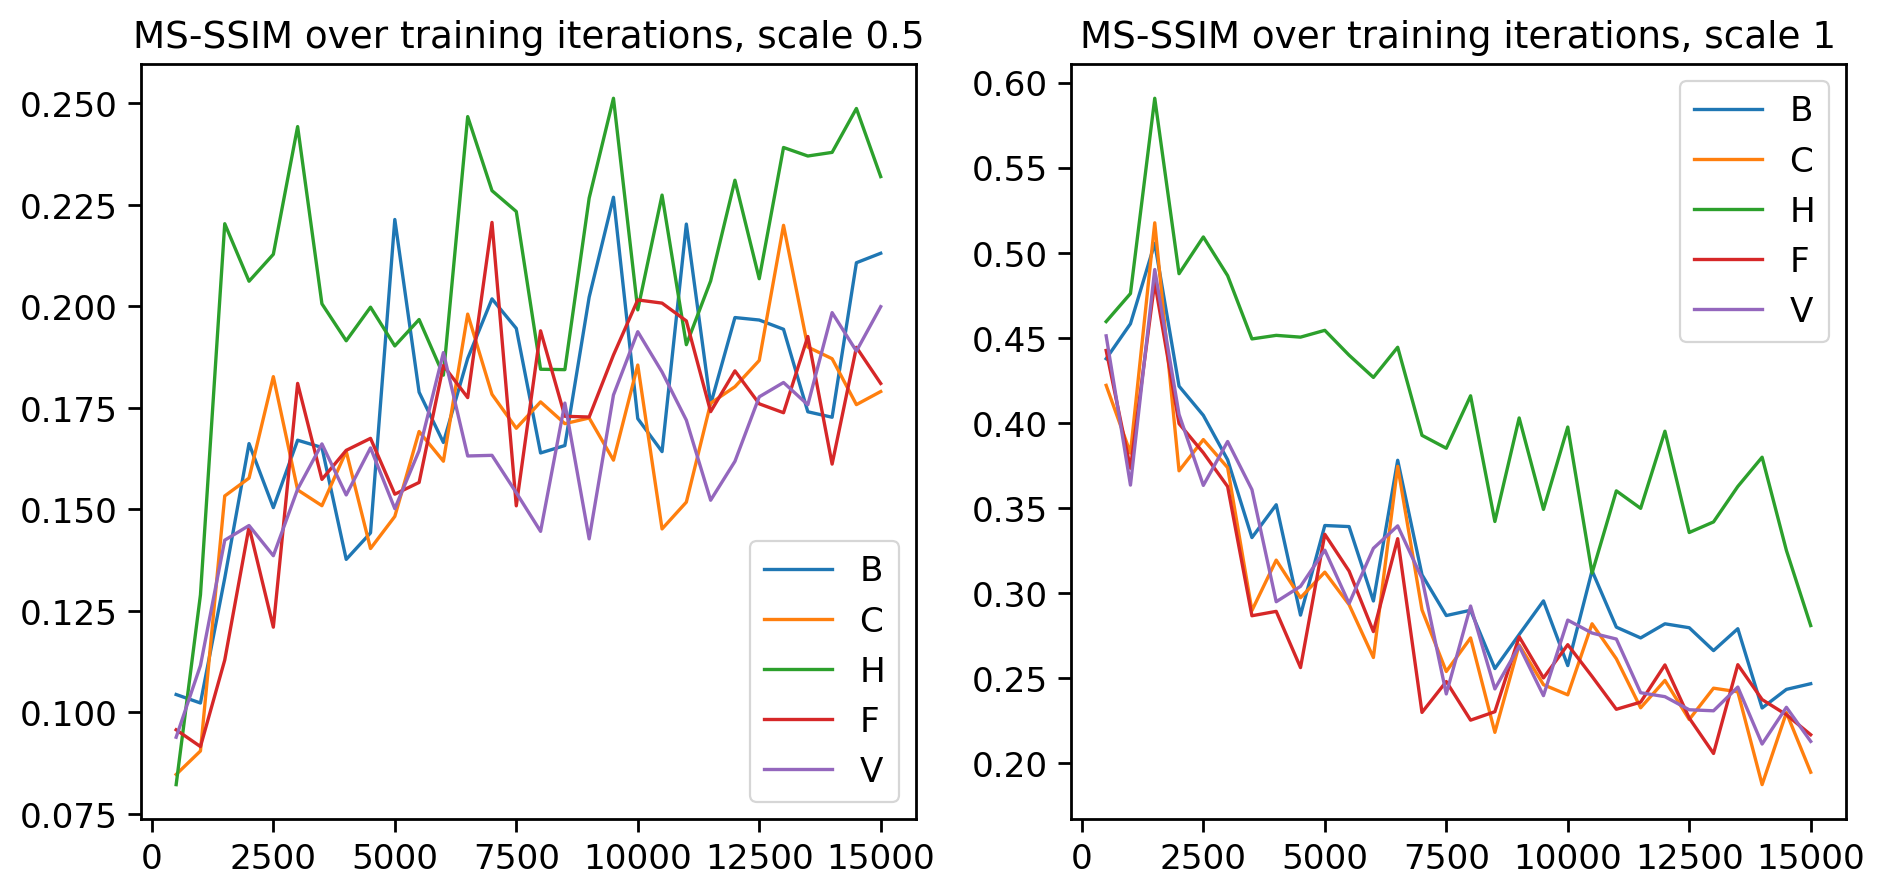

In [80]:
fig, axs = plt.subplots(1,2,figsize=(11,5),dpi=200)
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_lora/1e-4/sd_lora_scale05/{model}_train_metrics.csv')
    axs[0].plot(df['iterations'],df['ms_ssim'],label=f'{model[:1]}')
    df = pd.read_csv(f'export/train_metrics/sd_lora/1e-4/sd_lora_scale1/{model}_train_metrics.csv')
    axs[1].plot(df['iterations'],df['ms_ssim'],label=f'{model[:1]}')
axs[0].set_title('MS-SSIM over training iterations, scale 0.5')
axs[1].set_title('MS-SSIM over training iterations, scale 1')
axs[0].legend()
axs[1].legend()
plt.show()

## SD Lora 1e-5

In [81]:
models = ['B','C','H','F','V']

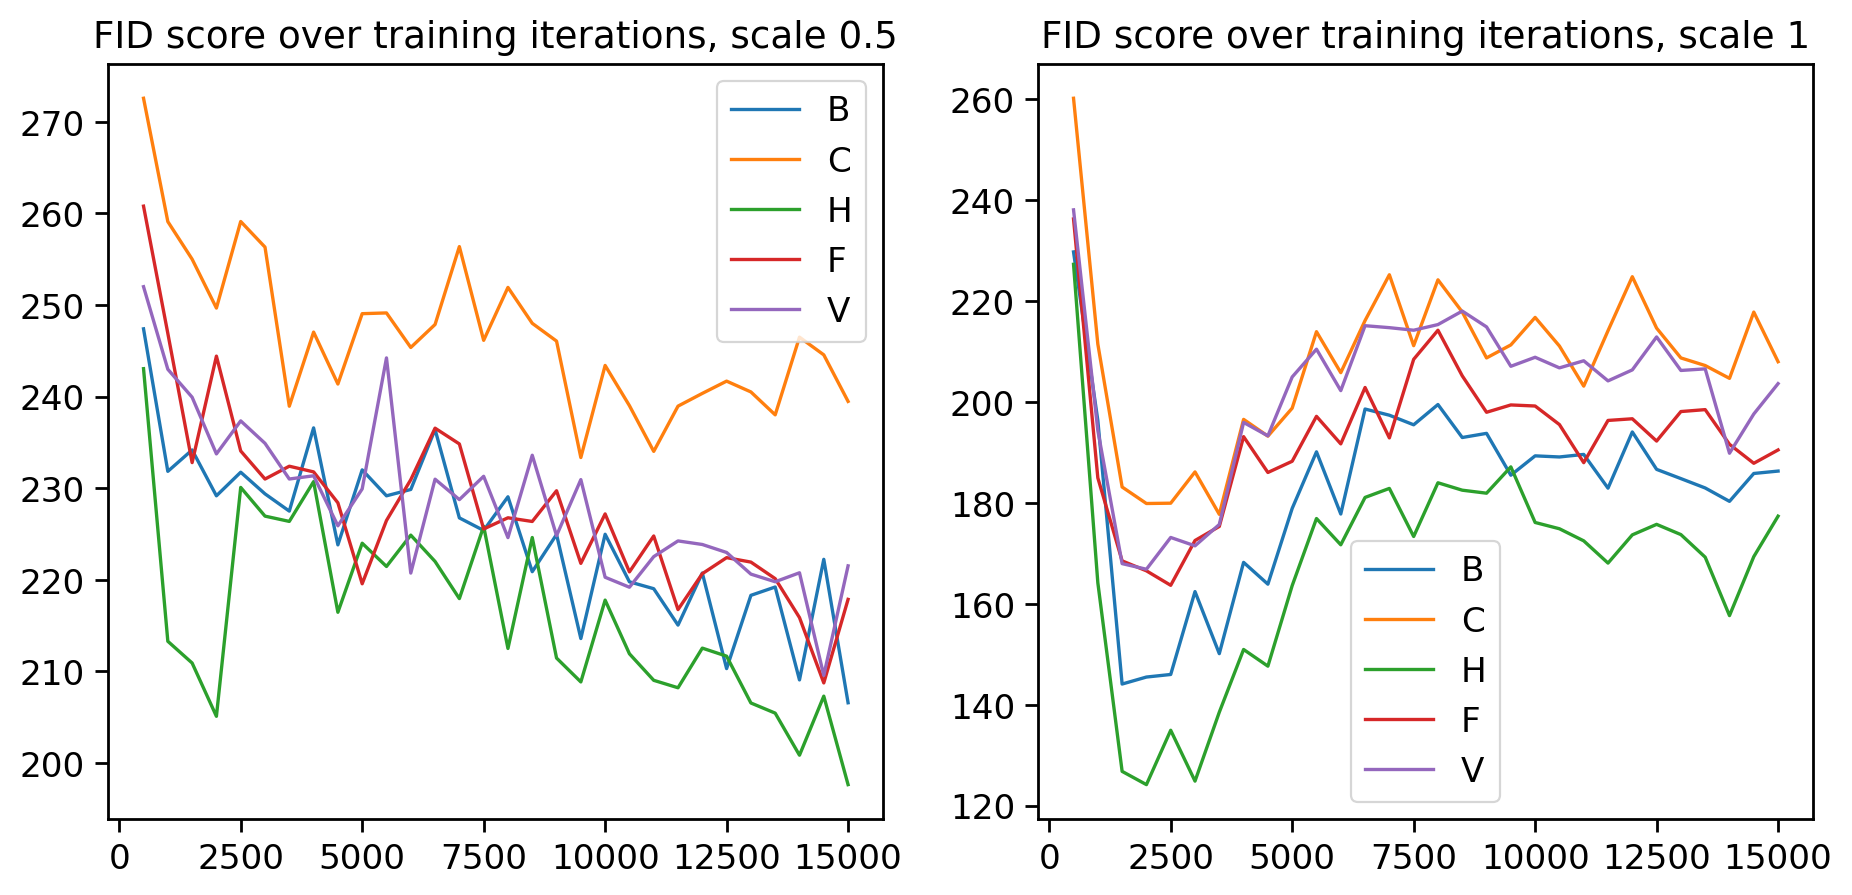

In [82]:
fig, axs = plt.subplots(1,2,figsize=(11,5),dpi=200)
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_lora/1e-5/sd_lora_scale05/{model}_train_metrics.csv')
    axs[0].plot(df['iterations'],df['fid'],label=f'{model[:1]}')
    df = pd.read_csv(f'export/train_metrics/sd_lora/1e-5/sd_lora_scale1/{model}_train_metrics.csv')
    axs[1].plot(df['iterations'],df['fid'],label=f'{model[:1]}')
axs[0].set_title('FID score over training iterations, scale 0.5')
axs[1].set_title('FID score over training iterations, scale 1')
axs[0].legend()
axs[1].legend()
plt.show()

In [83]:
fids05 = []
fids1 = []
print('LORA Scale 05')
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_lora/1e-5/sd_lora_scale05/{model}_train_metrics.csv')
    fids05.append(df['fid'].values)
    print(f"Lowest FID for model {model}: {df['fid'].min():.3f} in iteration {df.loc[df['fid']==df['fid'].min(),'iterations'].item()}")
print('\n')
print('LORA Scale 1')
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_lora/1e-5/sd_lora_scale1/{model}_train_metrics.csv')
    fids1.append(df['fid'].values)
    print(f"Lowest FID for model {model}: {df['fid'].min():.3f} in iteration {df.loc[df['fid']==df['fid'].min(),'iterations'].item()}")

LORA Scale 05
Lowest FID for model B: 206.583 in iteration 15000
Lowest FID for model C: 233.352 in iteration 9500
Lowest FID for model H: 197.647 in iteration 15000
Lowest FID for model F: 208.749 in iteration 14500
Lowest FID for model V: 209.566 in iteration 14500


LORA Scale 1
Lowest FID for model B: 144.112 in iteration 1500
Lowest FID for model C: 177.746 in iteration 3500
Lowest FID for model H: 124.179 in iteration 2000
Lowest FID for model F: 163.680 in iteration 2500
Lowest FID for model V: 166.862 in iteration 2000


In [84]:
df05 = pd.DataFrame(columns=['iterations','fid_B','fid_C','fid_H','fid_F','fid_V'])
df05['iterations'] = df['iterations']
df05['fid_B'] = fids05[0]
df05['fid_C'] = fids05[1]
df05['fid_H'] = fids05[2]
df05['fid_F'] = fids05[3]
df05['fid_V'] = fids05[4]
df05['fid_sum'] = df05['fid_B'] + df05['fid_C'] + df05['fid_H'] + df05['fid_F'] + df05['fid_V']

df1 = pd.DataFrame(columns=['iterations','fid_B','fid_C','fid_H','fid_F','fid_V'])
df1['iterations'] = df['iterations']
df1['fid_B'] = fids1[0]
df1['fid_C'] = fids1[1]
df1['fid_H'] = fids1[2]
df1['fid_F'] = fids1[3]
df1['fid_V'] = fids1[4]
df1['fid_sum'] = df1['fid_B'] + df1['fid_C'] + df1['fid_H'] + df1['fid_F'] + df1['fid_V']

In [85]:
print(f"Scale 05 - Lowest fid sum: {df05['fid_sum'].min():.3f} in iteration: {df05.loc[df05['fid_sum'] == df05['fid_sum'].min(),'iterations'].item()}")
print(f"Scale 1 - Lowest fid sum: {df1['fid_sum'].min():.3f} in iteration: {df1.loc[df1['fid_sum'] == df1['fid_sum'].min(),'iterations'].item()}")

Scale 05 - Lowest fid sum: 1083.106 in iteration: 15000
Scale 1 - Lowest fid sum: 782.981 in iteration: 2000


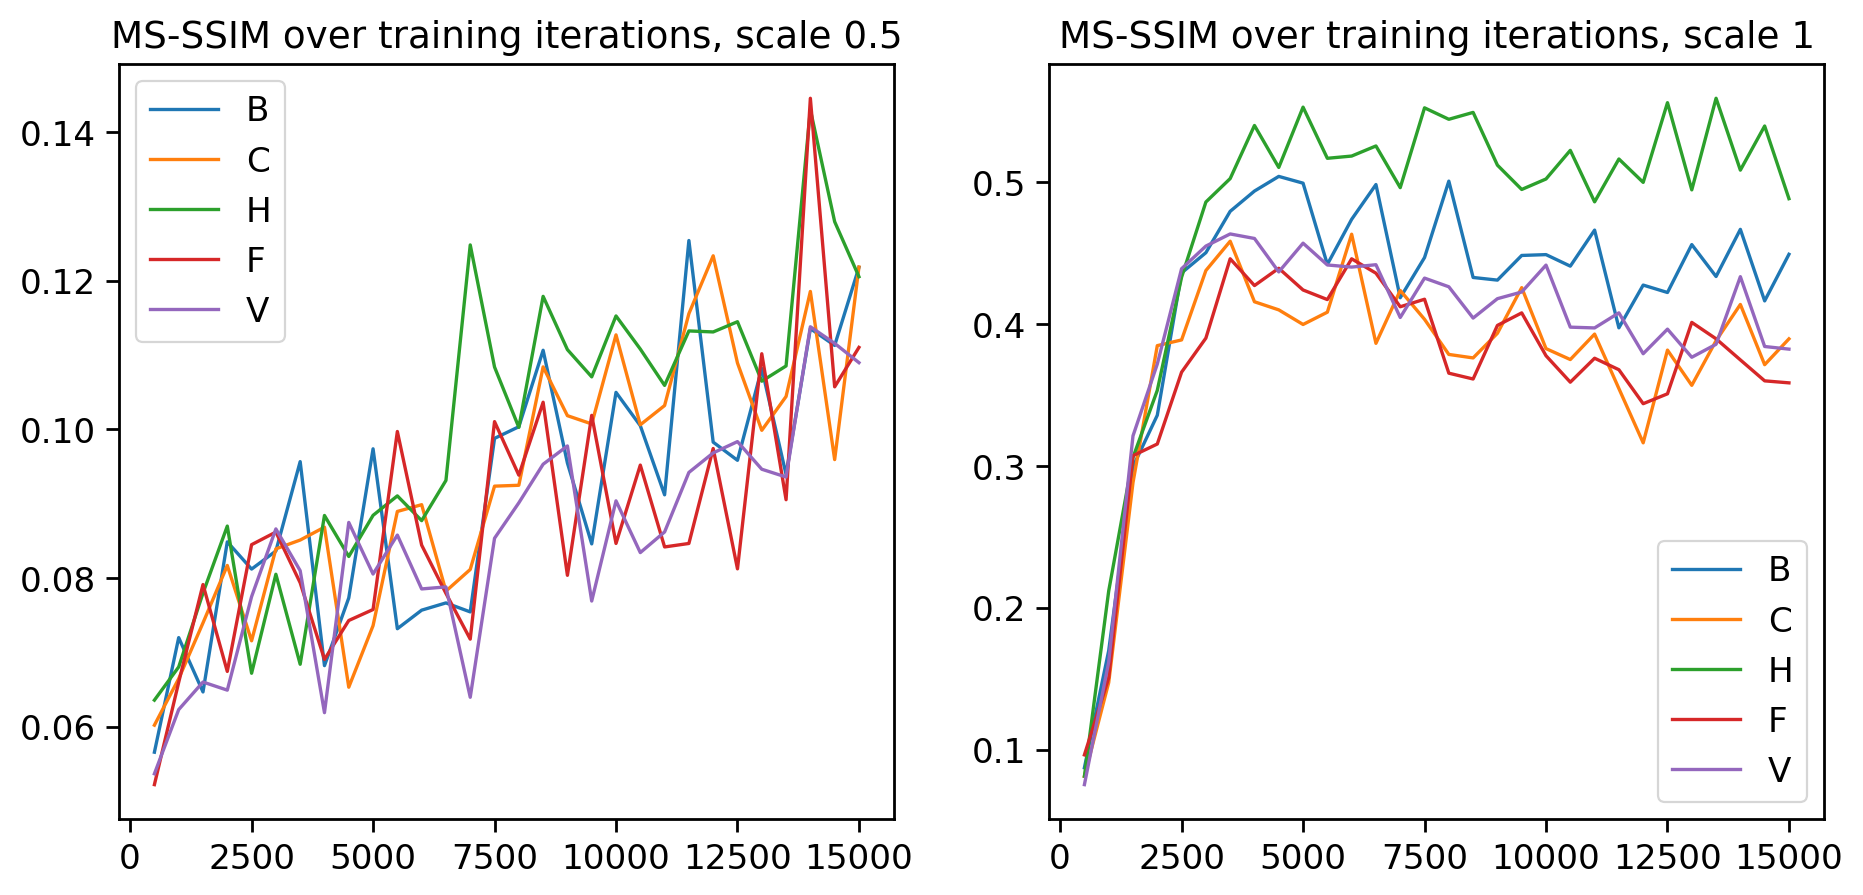

In [86]:
fig, axs = plt.subplots(1,2,figsize=(11,5),dpi=200)
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_lora/1e-5/sd_lora_scale05/{model}_train_metrics.csv')
    axs[0].plot(df['iterations'],df['ms_ssim'],label=f'{model[:1]}')
    df = pd.read_csv(f'export/train_metrics/sd_lora/1e-5/sd_lora_scale1/{model}_train_metrics.csv')
    axs[1].plot(df['iterations'],df['ms_ssim'],label=f'{model[:1]}')
axs[0].set_title('MS-SSIM over training iterations, scale 0.5')
axs[1].set_title('MS-SSIM over training iterations, scale 1')
axs[0].legend()
axs[1].legend()
plt.show()

## SD Dreambooth

In [87]:
models = ['B','C','H','F','V']

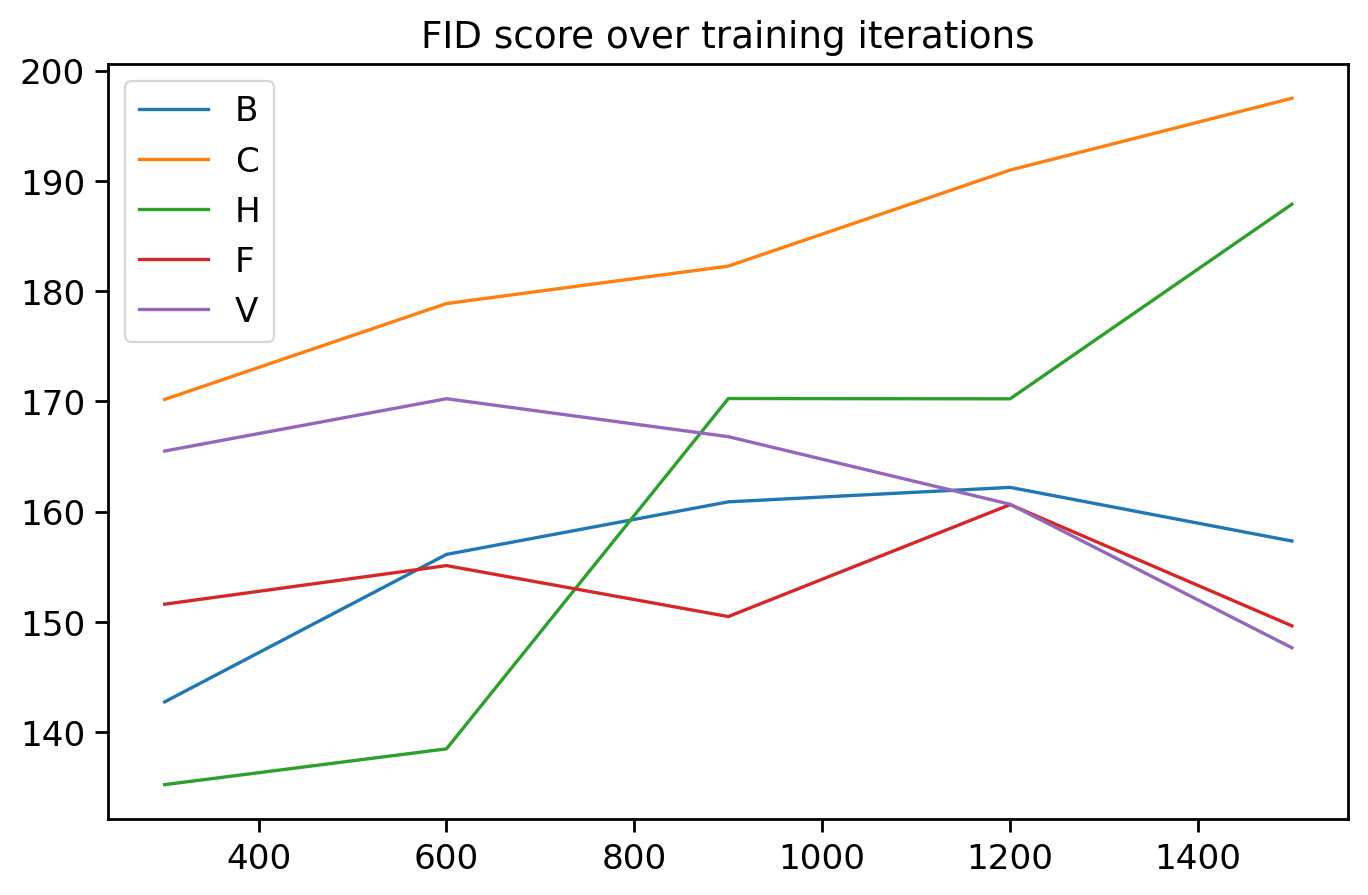

In [88]:
fig, ax = plt.subplots(figsize=(8,5),dpi=200)
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_dreambooth/{model}_train_metrics.csv')
    ax.plot(df['iterations'],df['fid'],label=f'{model[:1]}')
ax.set_title('FID score over training iterations')
ax.legend()
plt.show()

In [89]:
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_dreambooth/{model}_train_metrics.csv')
    print(f"Lowest FID for model {model}: {df['fid'].min():.3f} in iteration {df.loc[df['fid']==df['fid'].min(),'iterations'].item()}")

Lowest FID for model B: 142.744 in iteration 300
Lowest FID for model C: 170.174 in iteration 300
Lowest FID for model H: 135.237 in iteration 300
Lowest FID for model F: 149.640 in iteration 1500
Lowest FID for model V: 147.648 in iteration 1500


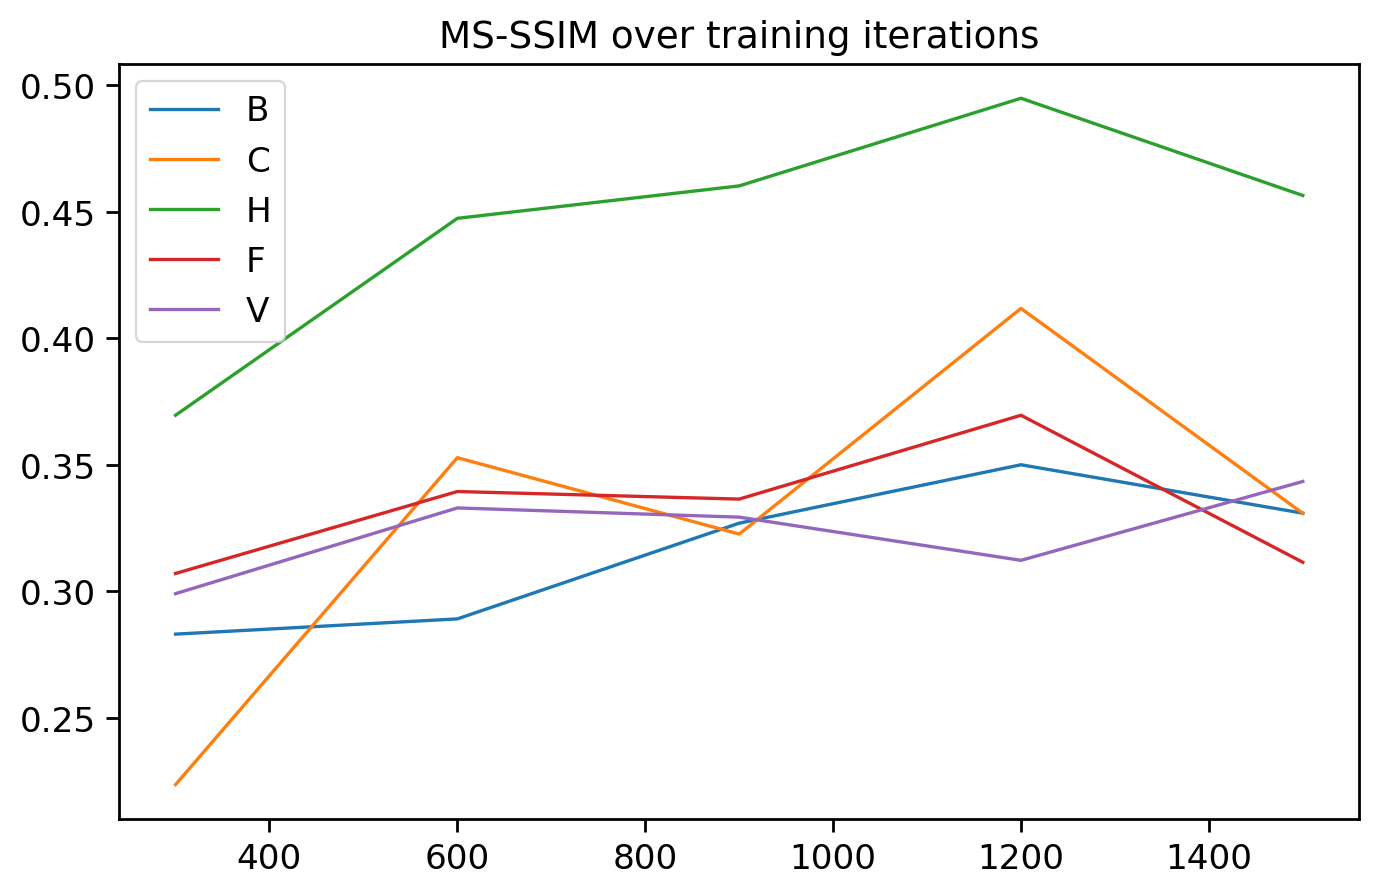

In [90]:
fig, ax = plt.subplots(figsize=(8,5),dpi=200)
for model in models:
    df = pd.read_csv(f'export/train_metrics/sd_dreambooth/{model}_train_metrics.csv')
    ax.plot(df['iterations'],df['ms_ssim'],label=f'{model[:1]}')
ax.set_title('MS-SSIM over training iterations')
ax.legend()
plt.show()

## GAN

In [91]:
models = ['B','C','H','F','V']

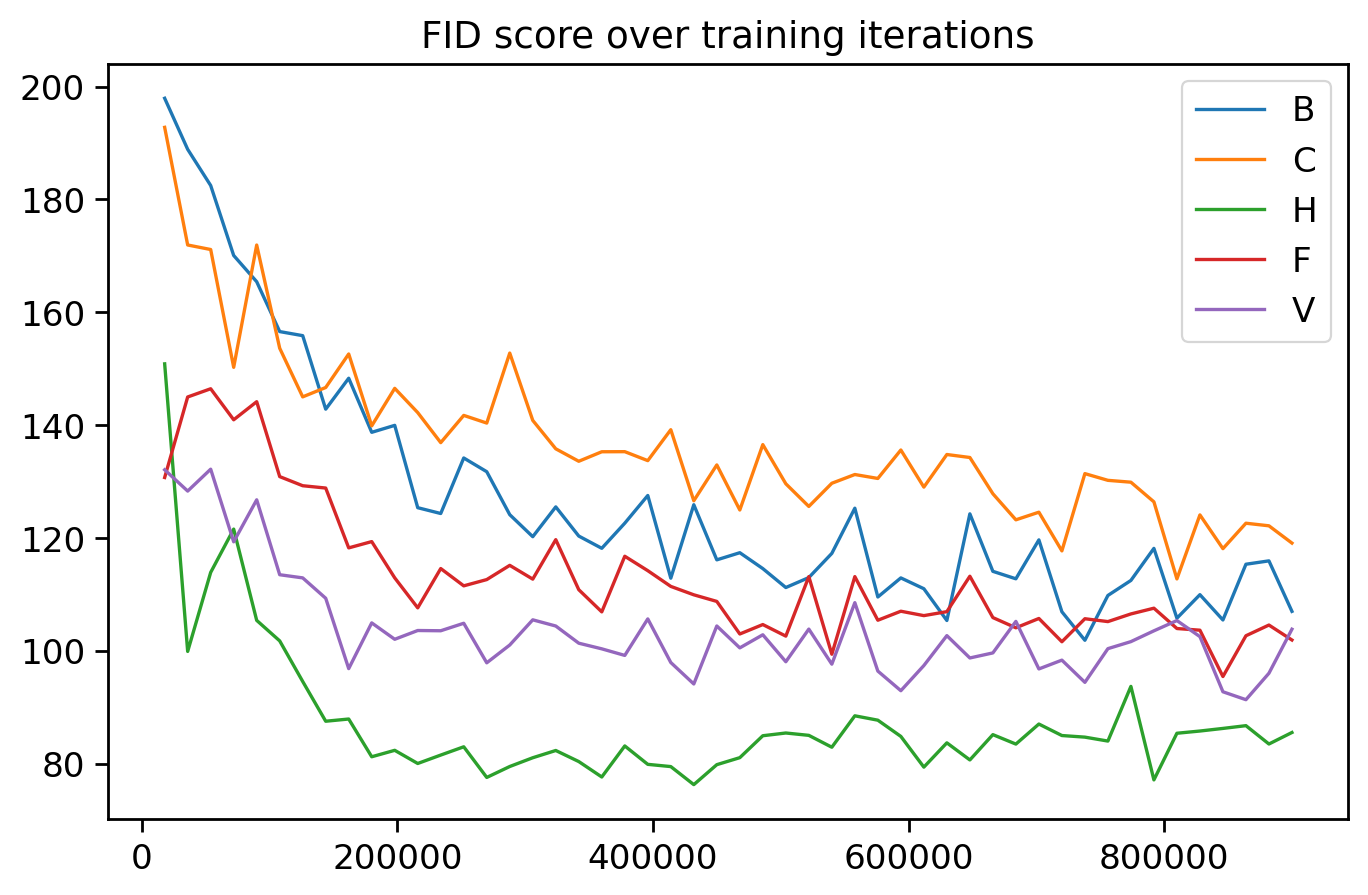

In [92]:
fig, ax = plt.subplots(figsize=(8,5),dpi=200)
for model in models:
    df = pd.read_csv(f'export/train_metrics/gan/{model}_train_metrics.csv')
    ax.plot(df['iterations'],df['fid'],label=f'{model[:1]}')
ax.set_title('FID score over training iterations')
ax.legend()
plt.show()

In [93]:
for model in models:
    df = pd.read_csv(f'export/train_metrics/gan/{model}_train_metrics.csv')
    print(f"Lowest FID for model {model}: {df['fid'].min():.3f} in iteration {df.loc[df['fid']==df['fid'].min(),'iterations'].item()}")

Lowest FID for model B: 101.860 in iteration 738003
Lowest FID for model C: 112.738 in iteration 810003
Lowest FID for model H: 76.269 in iteration 432003
Lowest FID for model F: 95.431 in iteration 846003
Lowest FID for model V: 91.327 in iteration 864003


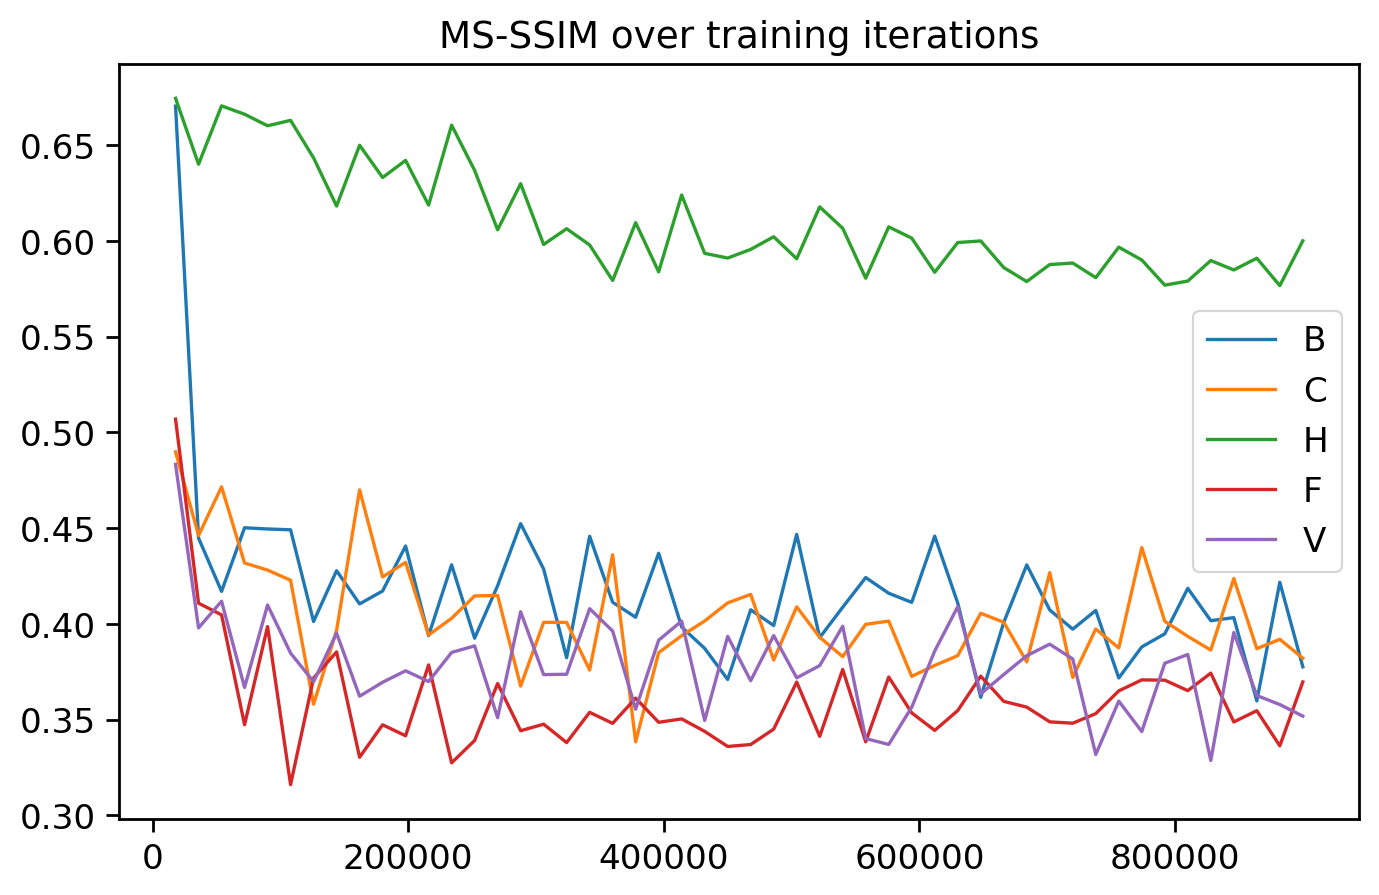

In [94]:
fig, ax = plt.subplots(figsize=(8,5),dpi=200)
for model in models:
    df = pd.read_csv(f'export/train_metrics/gan/{model}_train_metrics.csv')
    ax.plot(df['iterations'],df['ms_ssim'],label=f'{model[:1]}')
ax.set_title('MS-SSIM over training iterations')
ax.legend()
plt.show()

## Summaries

In [95]:
classes = ['V','H','F','C','B']
models = {'gan' : 'gan',
          'dreambooth' : 'sd_dreambooth',
          'finetuning' : 'sd_finetuning',
          'unconditional' : 'unconditional',
          'lora' : 'sd_lora/1e-5/sd_lora_scale1'}

df_total = pd.DataFrame()

for model_name,model_folder in models.items():
    for label in classes:
        df = pd.read_csv(f'export/train_metrics/{model_folder}/{label}_train_metrics.csv')
        df['class'] = label
        df['model'] = model_name

        df_total = pd.concat([df_total,df])
    

In [96]:
def list_to_latex(lst,two_elements=False,rounding=None):
    string = ''
    if rounding:
        lst = [round(x,rounding) for x in lst]

    if two_elements:
        lst1 = lst[0::2]
        lst2 = lst[1::2]

        for element1,element2 in zip(lst1,lst2):
            string = string + f'{str(element1)} ({str(element2)}) & '

    else:
        for element in lst:
            string = string + str(element) + ' & '

    string = string[:-3]
    return string


FID Table (with MS-SSIM for that iteration)

In [97]:
# header
print(f'\multicolumn{{1}}{{c}}{{method/class}} & {list_to_latex(classes)} & mean \\\\ \\midrule')
for model_name,_ in models.items():
    min_fid_list = []
    for i,label in enumerate(classes):
        min_fid = df_total.loc[(df_total['model'] == model_name) & (df_total['class'] == label),'fid'].min()
        min_fid_idx = df_total.loc[(df_total['model'] == model_name) & (df_total['class'] == label),'fid'].argmin()
        ms_ssim = df_total.iloc[min_fid_idx,df_total.columns.get_loc('ms_ssim')]
        min_fid_list.extend([min_fid,ms_ssim])
    print(f'{model_name}& {list_to_latex(min_fid_list,two_elements=True,rounding=2)} & {np.mean(min_fid_list[::2]):.2f}\\\\')

avg_class_fid = []
for label in classes:
    avg_class_fid.append(df_total.pivot_table(index='model',columns='class',values='fid',aggfunc=min).mean()[label])
print(f'mean& {list_to_latex(avg_class_fid,rounding=2)} & \\\\')

\multicolumn{1}{c}{method/class} & V & H & F & C & B & mean \\ \midrule
gan& 91.33 (0.36) & 76.27 (0.35) & 95.43 (0.4) & 112.74 (0.38) & 101.86 (0.33) & 95.52\\
dreambooth& 147.65 (0.41) & 135.24 (0.48) & 149.64 (0.41) & 170.17 (0.48) & 142.74 (0.48) & 149.09\\
finetuning& 127.45 (0.41) & 81.2 (0.37) & 125.1 (0.41) & 135.52 (0.37) & 116.76 (0.36) & 117.21\\
unconditional& 118.66 (0.67) & 79.31 (0.67) & 123.36 (0.39) & 131.58 (0.38) & 117.36 (0.34) & 114.05\\
lora& 166.86 (0.37) & 124.18 (0.37) & 163.68 (0.41) & 177.75 (0.37) & 144.11 (0.41) & 155.32\\
mean& 130.39 & 99.24 & 131.44 & 145.55 & 124.57 & \\


MS-SSIM Table

In [98]:
# header
print(f'\multicolumn{{1}}{{c}}{{method/class}} & {list_to_latex(classes)} & mean \\\\ \\midrule')
for model_name,_ in models.items():
    min_msssim_list = []
    for i,label in enumerate(classes):
        min_msssim = df_total.loc[(df_total['model'] == model_name) & (df_total['class'] == label),'ms_ssim'].min()
        min_msssim_list.append(min_msssim)
    print(f'{model_name}& {list_to_latex(min_msssim_list,rounding=2)} & {np.mean(min_msssim_list):.2f}\\\\')

avg_class_msssim = []
for label in classes:
    avg_class_msssim.append(df_total.pivot_table(index='model',columns='class',values='ms_ssim',aggfunc=min).mean()[label])
print(f'mean& {list_to_latex(avg_class_msssim,rounding=2)} & \\\\')

\multicolumn{1}{c}{method/class} & V & H & F & C & B & mean \\ \midrule
gan& 0.33 & 0.58 & 0.32 & 0.34 & 0.36 & 0.38\\
dreambooth& 0.3 & 0.37 & 0.31 & 0.22 & 0.28 & 0.30\\
finetuning& 0.19 & 0.43 & 0.16 & 0.24 & 0.22 & 0.25\\
unconditional& 0.04 & 0.05 & 0.05 & 0.04 & 0.04 & 0.05\\
lora& 0.08 & 0.08 & 0.1 & 0.08 & 0.09 & 0.08\\
mean& 0.19 & 0.3 & 0.19 & 0.18 & 0.2 & \\


In [99]:
class_name_mapping = {'H' : 'Healthy',
                      'C' : 'COVID-19',
                      'B' : 'Bacterial',
                      'F' : 'Fungal',
                      'V' : 'Viral'}

model_name_mapping = {'gan' : 'GAN',
                      'dreambooth' : 'DreamBooth',
                      'finetuning' : 'Fine-tuning',
                      'unconditional' : 'Unconditional',
                      'lora' : 'LoRA'}

In [100]:
df_total['class_name'] = df_total['class'].map(class_name_mapping)
df_total['model_name'] = df_total['model'].map(model_name_mapping)

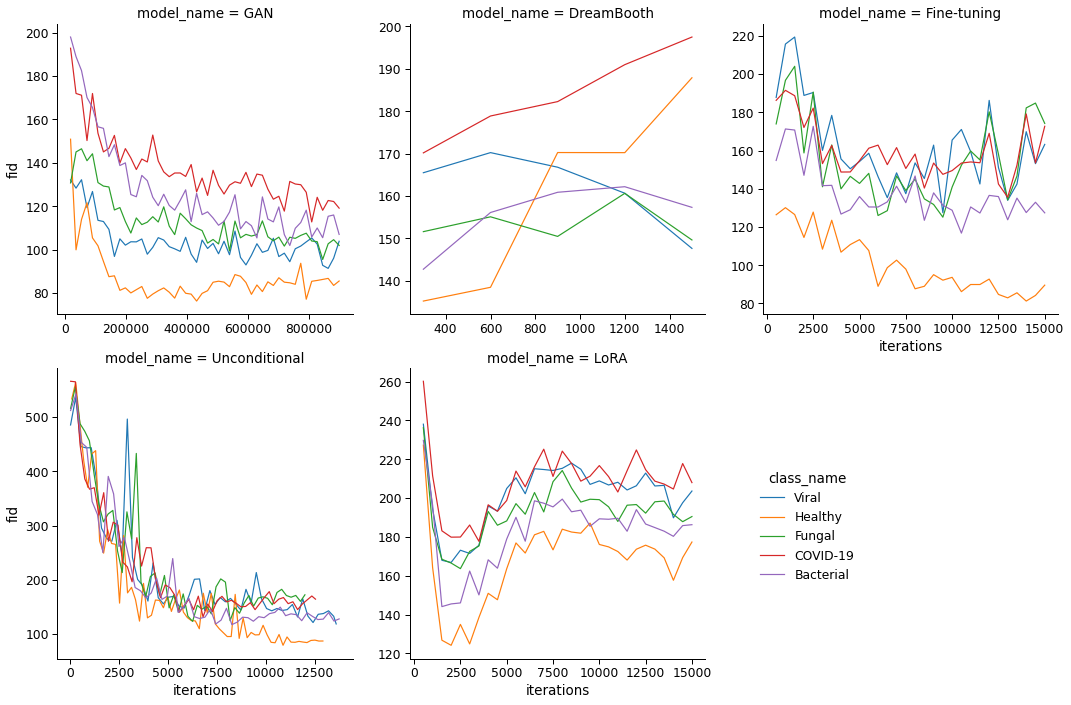

In [101]:
sns.set_context('paper',font_scale=1.4)
g = sns.relplot(data=df_total, x="iterations", y="fid", kind="line", hue='class_name', col='model_name', facet_kws={'sharex':False,'sharey':False,'legend_out':False, 'despine':True},col_wrap=3)
sns.move_legend(g, "upper left", bbox_to_anchor=(.70, .35),frameon=False)
g.savefig('export/train_metrics/plots/fid_all_classes.pdf')

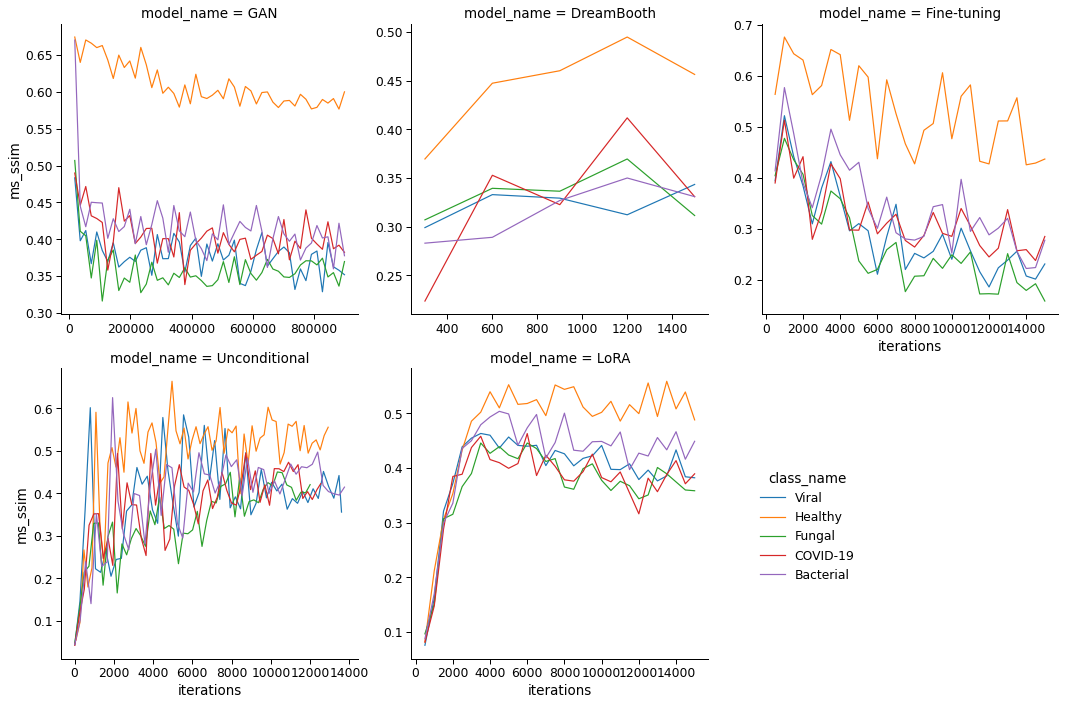

In [102]:
sns.set_context('paper',font_scale=1.4)
g = sns.relplot(data=df_total, x="iterations", y="ms_ssim", kind="line", hue='class_name', col='model_name', facet_kws={'sharex':False,'sharey':False,'legend_out':False, 'despine':True},col_wrap=3)
sns.move_legend(g, "upper left", bbox_to_anchor=(.70, .35),frameon=False)
g.savefig('export/train_metrics/plots/msssim_all_classes.pdf')

In [103]:
df_total[df_total['model'] == 'gan']['iterations'].describe()

count       250.00000
mean     459003.00000
std      260276.72947
min       18003.00000
25%      234003.00000
50%      459003.00000
75%      684003.00000
max      900003.00000
Name: iterations, dtype: float64

## Radiological Assessment

In [104]:
df = pd.read_csv('images/assessment/quality_assessment.csv')

In [105]:
df = df.rename(columns={'pathology':'plausibility'})

In [106]:
df.head()

,img_id,class,model,quality,plausibility
0,1,B,gan,5,3
1,2,B,gan,4,2
2,3,B,gan,4,2
3,4,B,gan,3,2
4,5,B,gan,4,2


In [107]:
df.loc[df['model']=='gan',['quality']].std().item()

1.0609186524407872

In [108]:
for model in ['gan','dreambooth','finetuning','lora','unconditional']:
    print(model)
    mean_quality = df.loc[df['model']==model,['quality']].mean().item()
    std_quality = df.loc[df['model']==model,['quality']].std().item()
    mean_plausibility = df.loc[df['model']==model,['plausibility']].mean().item()
    std_plausibility = df.loc[df['model']==model,['plausibility']].std().item()
    print(f'Quality : {mean_quality:.2f} +/- {std_quality:.2f}')
    print(f'Plausibility : {mean_plausibility:.2f} +/- {std_plausibility:.2f}')

gan
Quality : 3.62 +/- 1.06
Plausibility : 2.25 +/- 0.80
dreambooth
Quality : 1.64 +/- 0.87
Plausibility : 1.26 +/- 0.54
finetuning
Quality : 2.94 +/- 1.07
Plausibility : 2.00 +/- 0.81
lora
Quality : 1.31 +/- 0.65
Plausibility : 1.06 +/- 0.25
unconditional
Quality : 3.27 +/- 1.01
Plausibility : 2.02 +/- 0.74


In [109]:
df_long = df.melt(id_vars=['img_id','class','model'],value_vars=['quality','plausibility'])

In [110]:
df_long.head()

,img_id,class,model,variable,value
0,1,B,gan,quality,5
1,2,B,gan,quality,4
2,3,B,gan,quality,4
3,4,B,gan,quality,3
4,5,B,gan,quality,4


In [111]:
df_long['class_name'] = df_long['class'].map(class_name_mapping)
df_long['model_name'] = df_long['model'].map(model_name_mapping)

In [112]:
fig, ax = plt.subplots(figsize=(12,7),dpi=100)
sns.boxplot(x='model_name',y='value',hue='variable',data=df_long,medianprops={'color' : 'red'},palette='pastel')
plt.xlabel('model',fontsize=16)
plt.ylabel('value',fontsize=16)
plt.savefig('export/assessment/assessment_boxplot_per_model.pdf')
plt.close()

In [113]:
fig, ax = plt.subplots(figsize=(12,7),dpi=100)
sns.boxplot(x='class_name',y='value',hue='variable',data=df_long,medianprops={'color' : 'red'},palette='pastel')
plt.xlabel('class',fontsize=16)
plt.ylabel('value',fontsize=16)
plt.savefig('export/assessment/assessment_boxplot_per_class.pdf')
plt.close()
#plt.show()

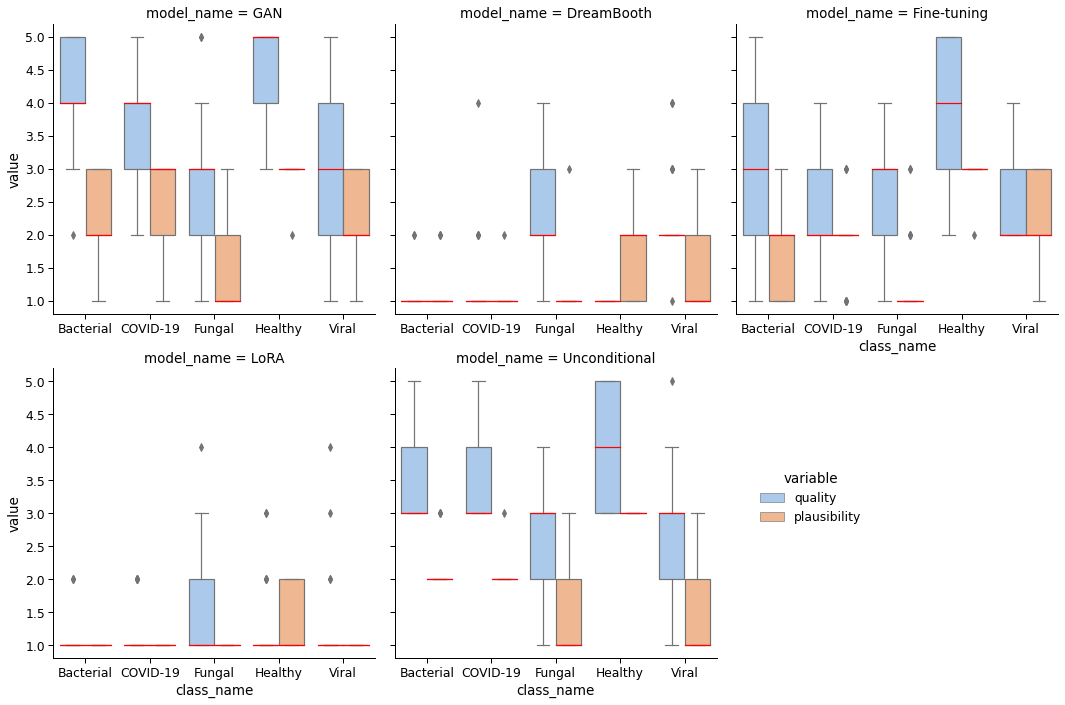

In [114]:
#fig, ax = plt.subplots(figsize=(12,7),dpi=100)
sns.set_context('paper',font_scale=1.4)
g = sns.catplot(kind='box',data=df_long,x='class_name',hue='variable',y='value',col='model_name',margin_titles=False,legend_out=False,medianprops={'color' : 'red'},palette='pastel',col_wrap=3,sharex=False)
sns.move_legend(g, "upper left", bbox_to_anchor=(.70, .35),frameon=False)
g.savefig('export/assessment/assessment_boxplot_per_model_per_class.pdf')

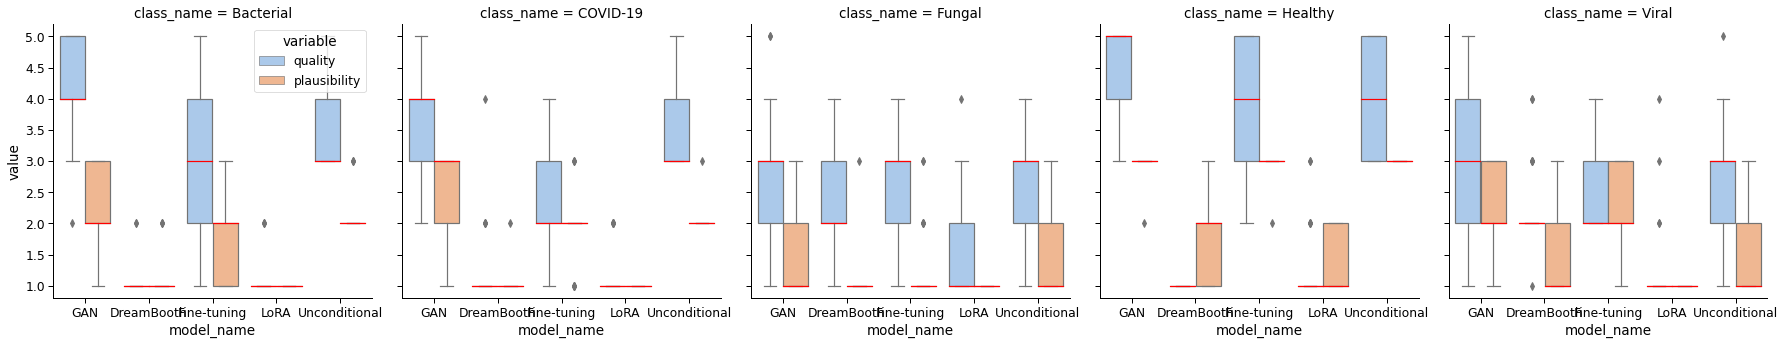

In [115]:
#fig, ax = plt.subplots(figsize=(12,7),dpi=100)
sns.set_context('paper',font_scale=1.4)
sns.catplot(kind='box',data=df_long,x='model_name',hue='variable',y='value',col='class_name',margin_titles=False,legend_out=False,medianprops={'color' : 'red'},palette='pastel')
plt.show()

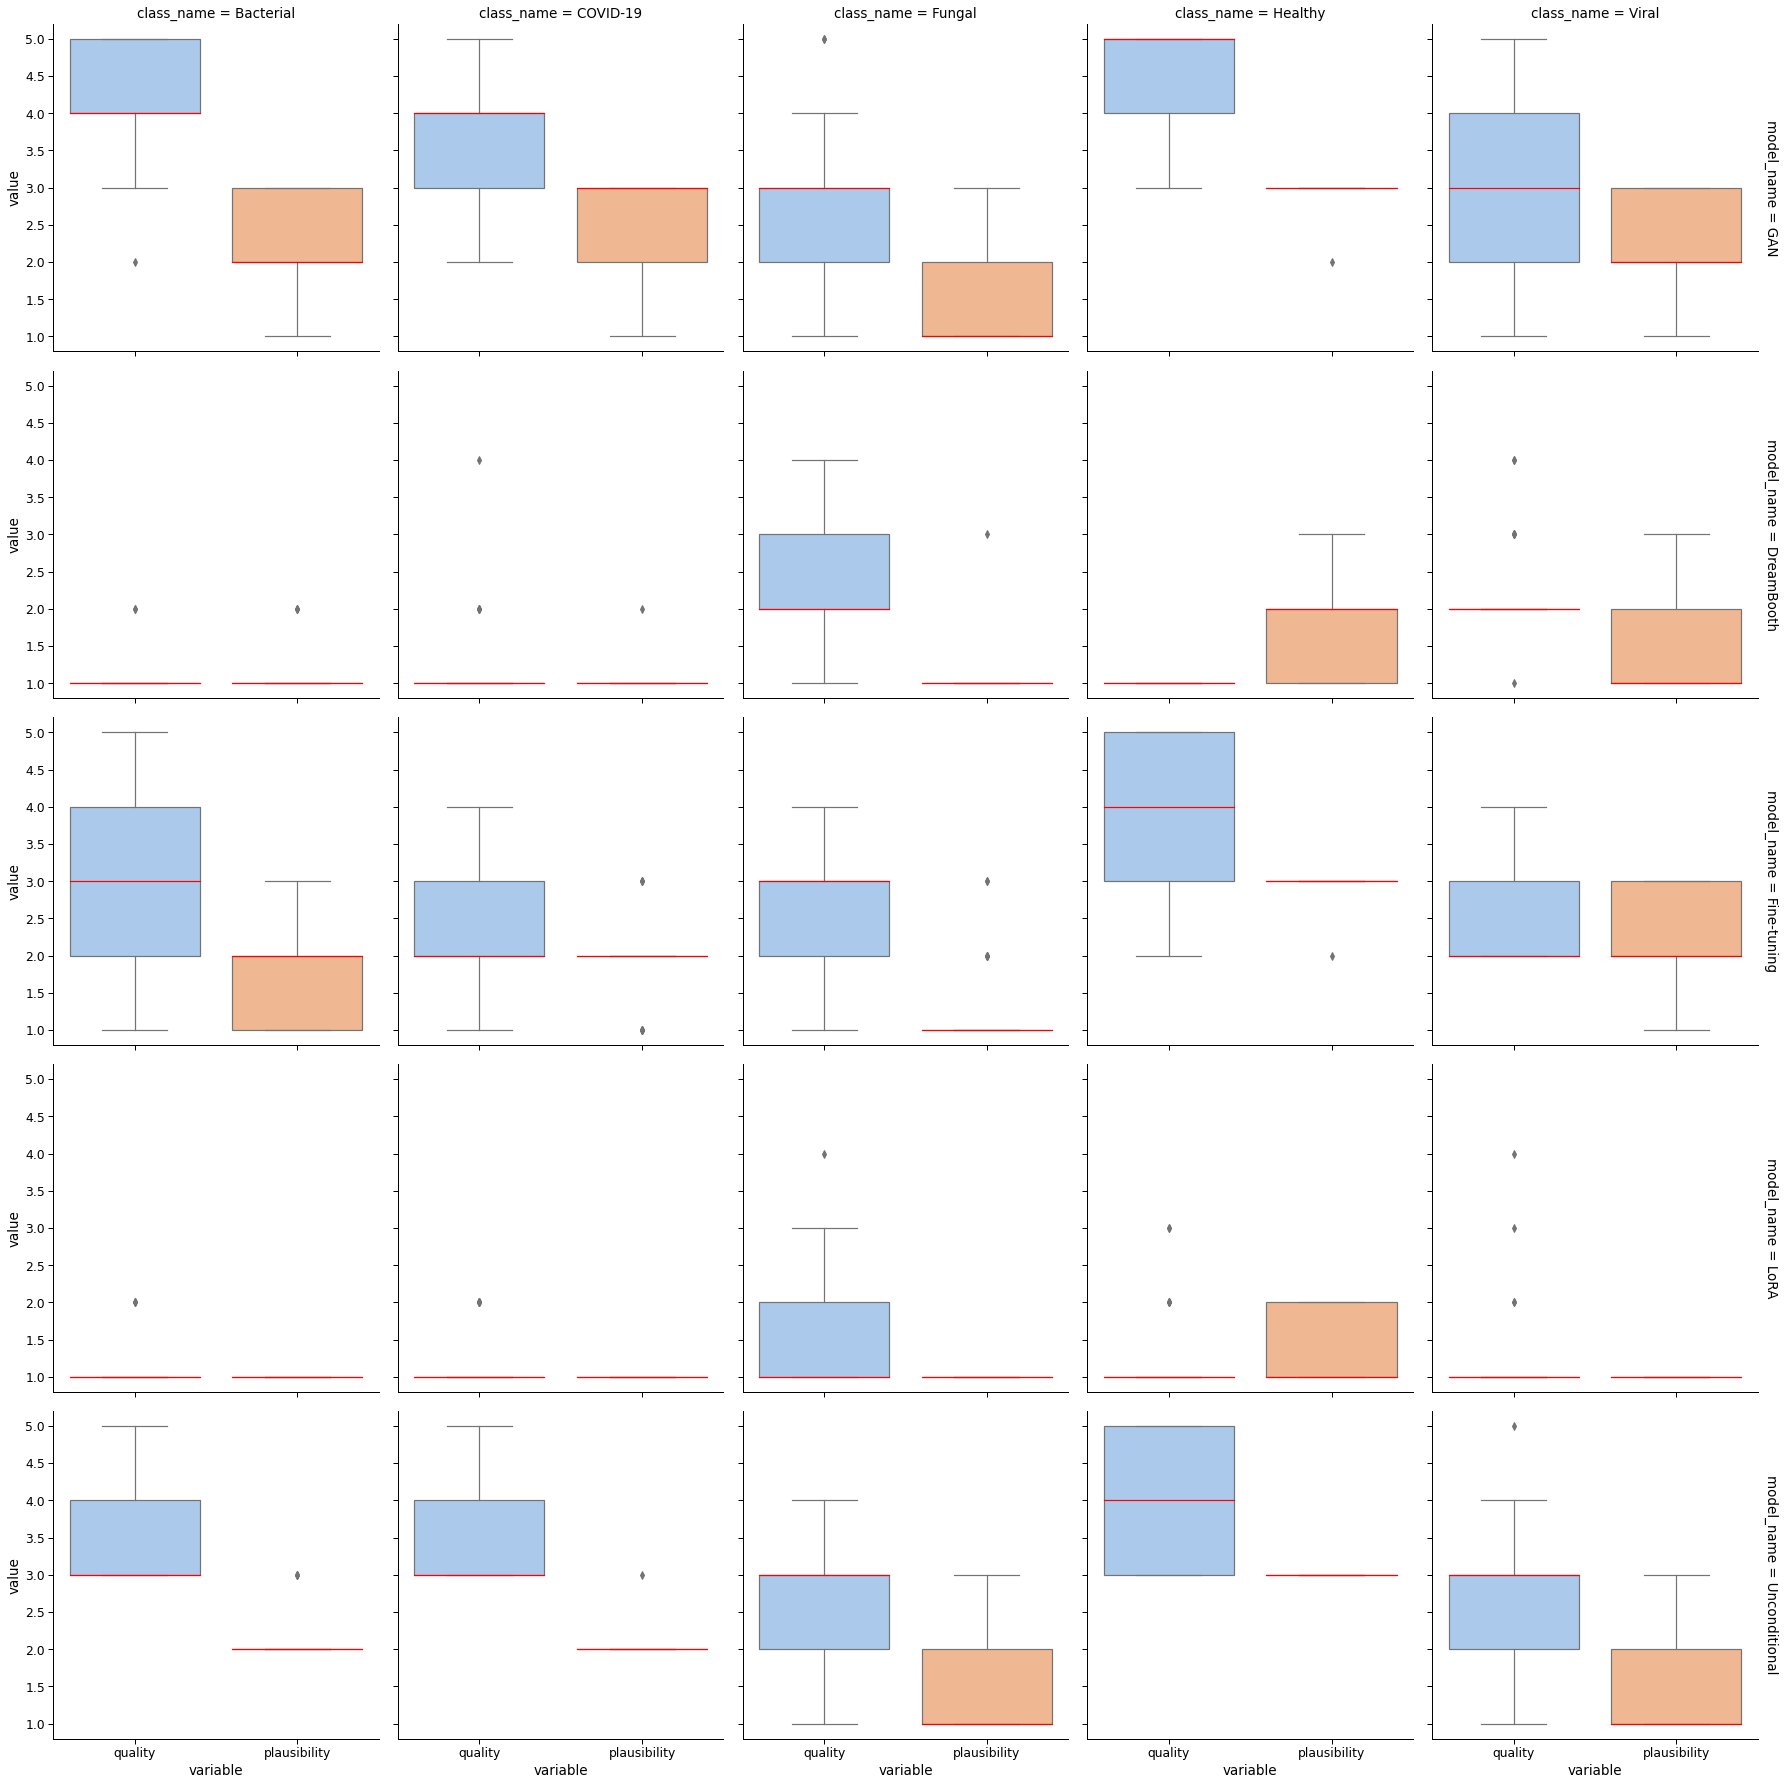

In [116]:
#fig, ax = plt.subplots(figsize=(12,7),dpi=100)
sns.set_context('paper',font_scale=1.4)
sns.catplot(kind='box',data=df_long,x='variable',y='value',col='class_name',row='model_name',margin_titles=True,medianprops={'color' : 'red'},palette='pastel')
plt.show()